# **Analise do data set Bike Rentals**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('daily-bike-share.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


- **Season = (1:spring, 2:summer, 3:fall, 4:winter)**
- **yr (year) = year 0 represents 2011, and year 1 represents 2012**
- **holiday: A binary value indicating whether or not the observation was made on a public holiday)**
- **weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)**
- **workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)**
- **weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)**
- **temp: The temperature in celsius (normalized)**
- **hum: The humidity level (normalized)**
- **windspeed: The windspeed (normalized)**
- **rentals: The number of bicycle rentals recorded**

In this dataset, rentals represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

As mentioned previously, you can perform some feature engineering to combine or derive new features. For example, 
let's add a new column named day to the dataframe by extracting the day component from the existing dteday column. 
The new column represents the day of the month from 1 to 31.

In [4]:
df['day'] = pd.DatetimeIndex(df['dteday']).day

In [5]:
df.head(186)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,7/1/2011,3,0,7,0,5,1,1,0.722500,0.652162,0.396250,0.102608,1246,1
182,183,7/2/2011,3,0,7,0,6,0,1,0.738333,0.667308,0.444583,0.115062,2204,2
183,184,7/3/2011,3,0,7,0,0,0,2,0.716667,0.668575,0.682500,0.228858,2282,3
184,185,7/4/2011,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,4


# **Describe das features númericas do data set**

In [6]:
numeric_features = ['temp','atemp','hum','windspeed']
df[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


# **Gráfico da mediana e media das features númericas**

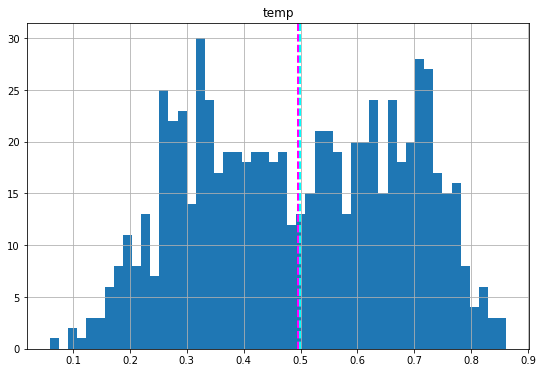

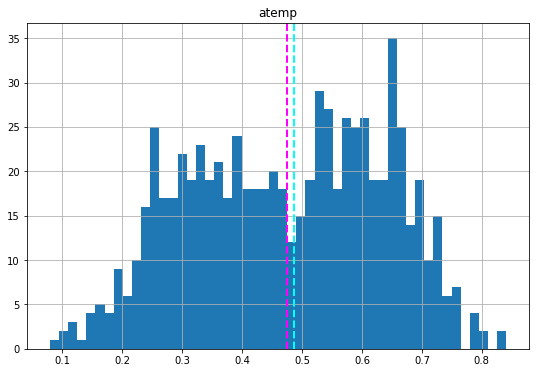

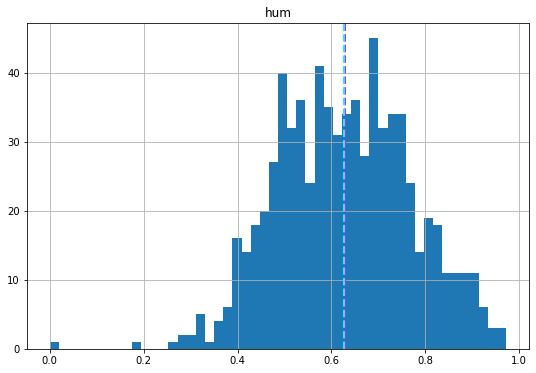

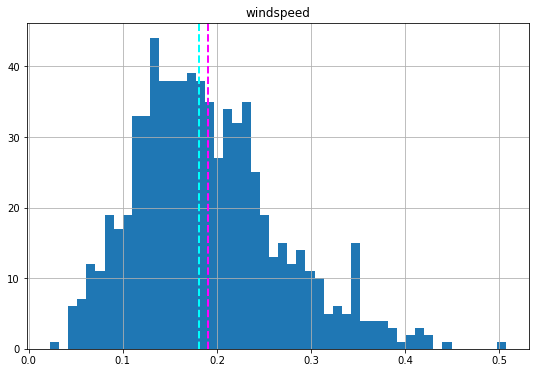

In [7]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(feature.median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(col)
    plt.show();

In [8]:
df.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1


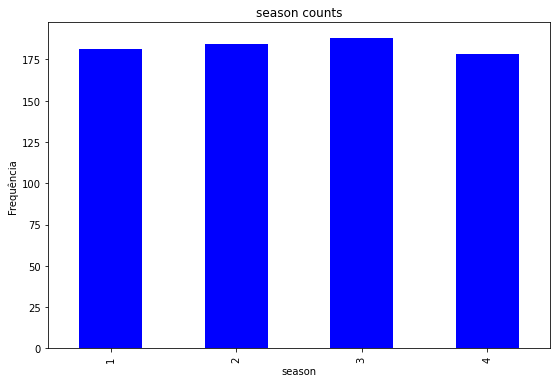

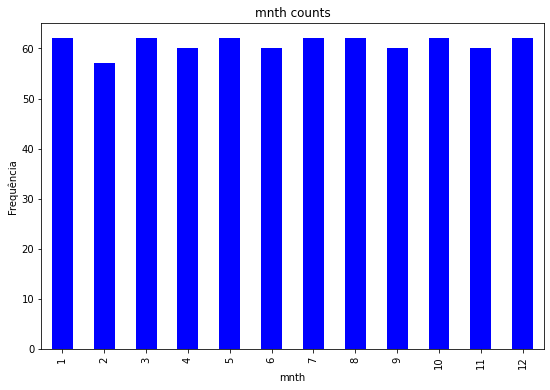

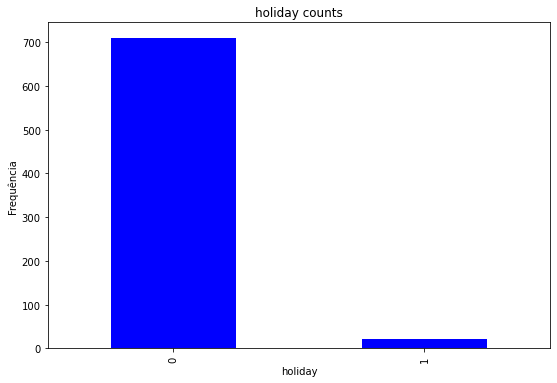

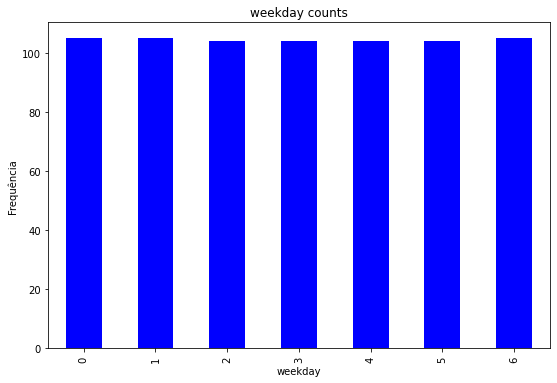

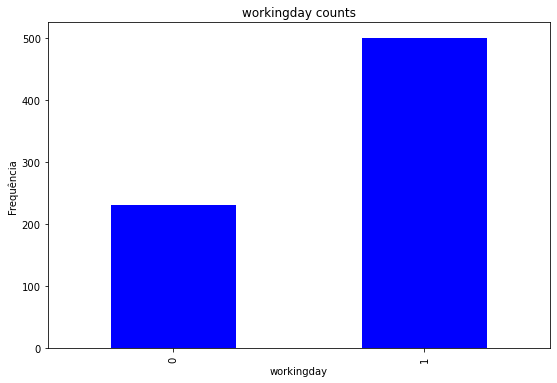

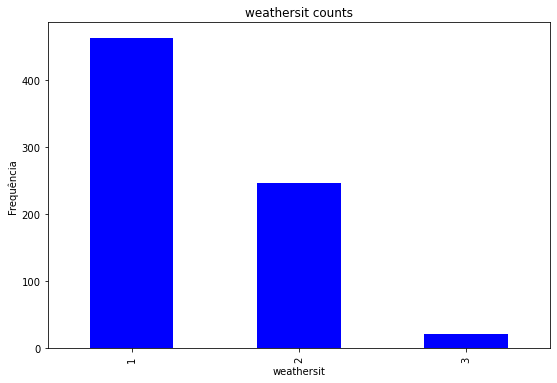

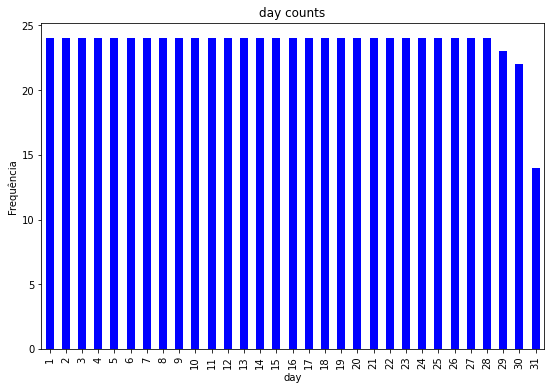

In [9]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','day']
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color = 'blue')
    ax.set_title(col + " counts")
    ax.set_xlabel(col)
    ax.set_ylabel('Frequência')
plt.show();

# Gráfico da quantidade de alugueis no ano de 2011 e 2012 divido por estação, mês, feriado, dia da semana, dia de trabalho, clima e dia.

**'Estação do ano'(season), 'Mês'(mnth), 'Feriado'(holiday), 'Dias da semana'(weekday), 'Dia de trabalho'(workingday), 'Clima'(weathersit), 'Dia'(day)**

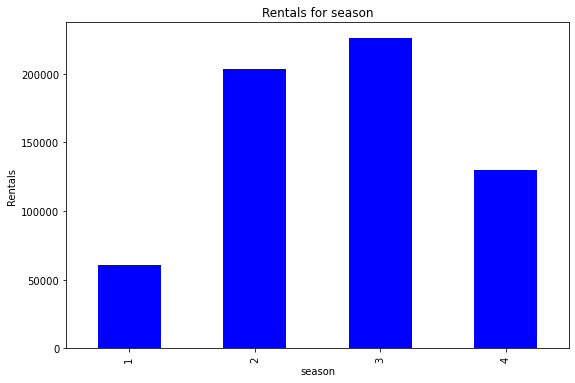

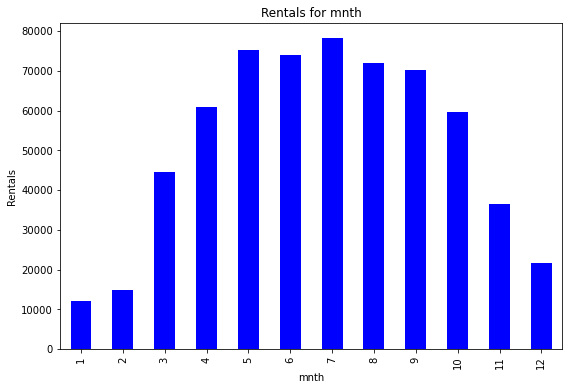

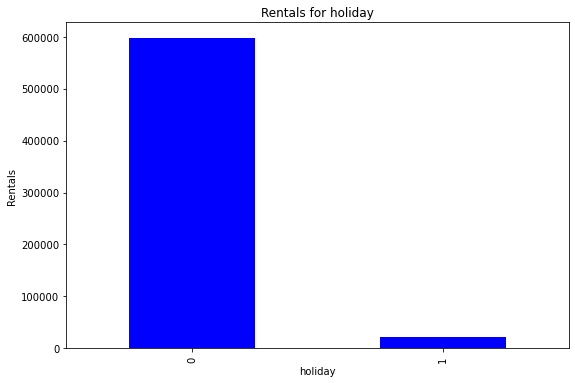

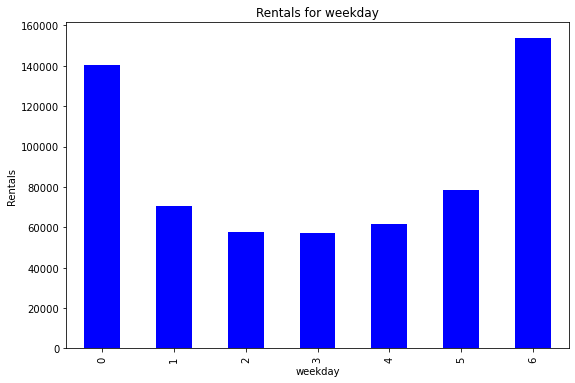

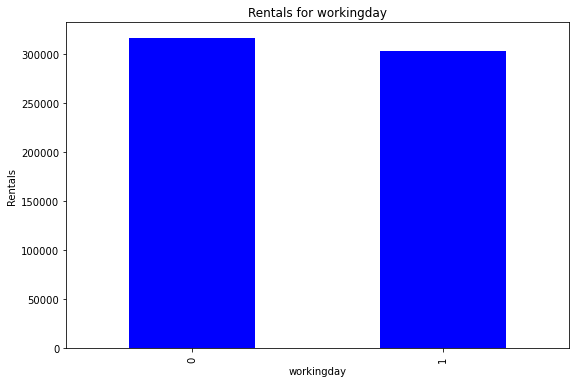

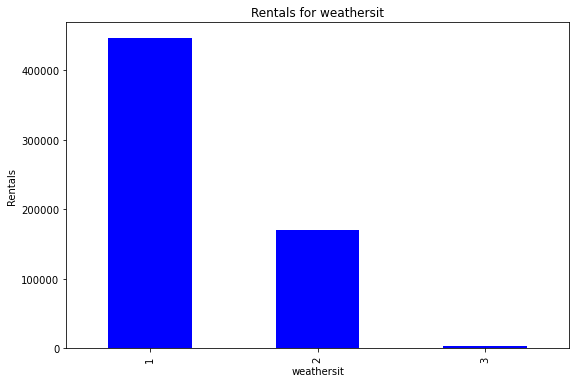

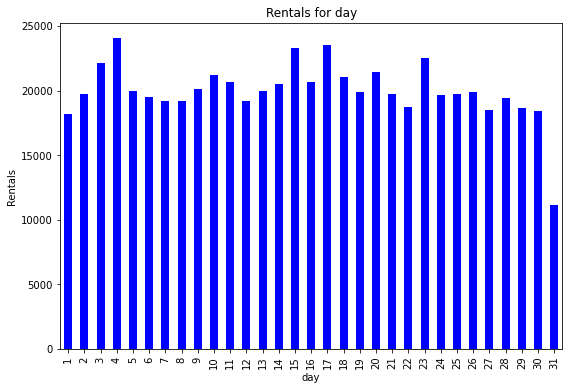

In [10]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','day']
for col in categorical_features:
    counts = df.groupby(col)['rentals'].sum()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color = 'blue')
    ax.set_title('Rentals' + ' for ' +col)
    ax.set_xlabel(col)
    ax.set_ylabel('Rentals')
plt.show();

# Boxplot da quantidade de alugueis no ano de 2011 e 2012 divido por estação, mês, feriado, dia da semana, dia de trabalho, clima e dia.

**'Estação do ano'(season), 'Mês'(mnth), 'Feriado'(holiday), 'Dias da semana'(weekday), 'Dia de trabalho'(workingday), 'Clima'(weathersit), 'Dia'(day)**

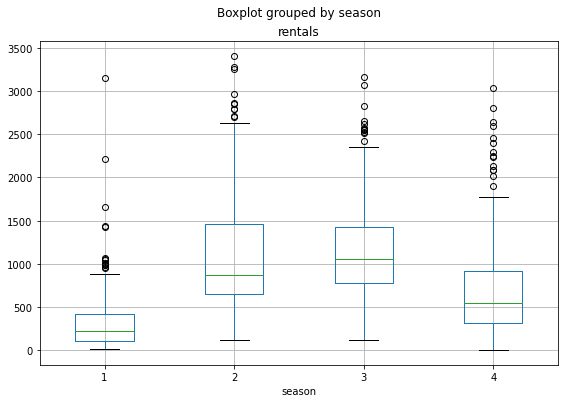

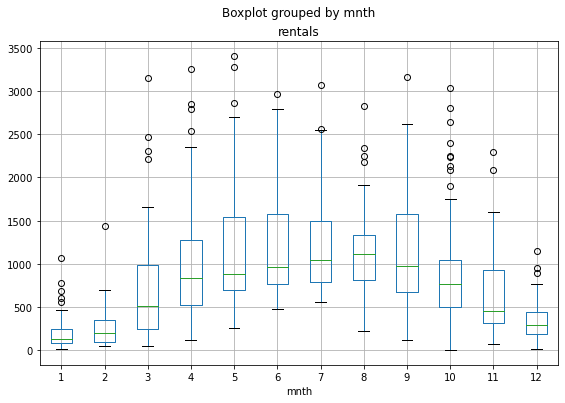

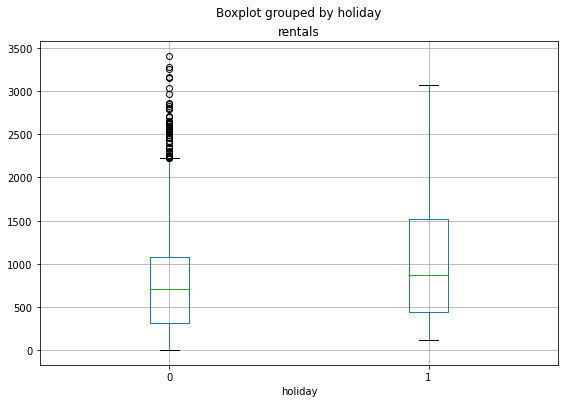

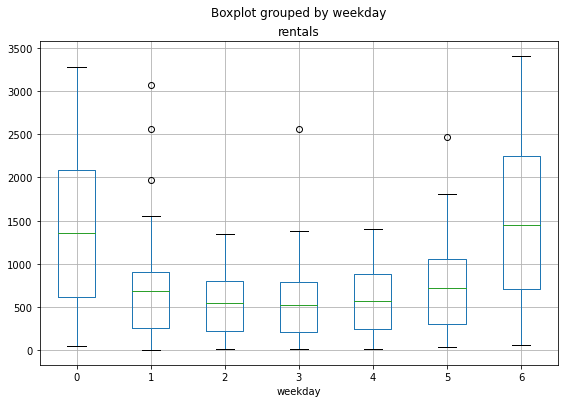

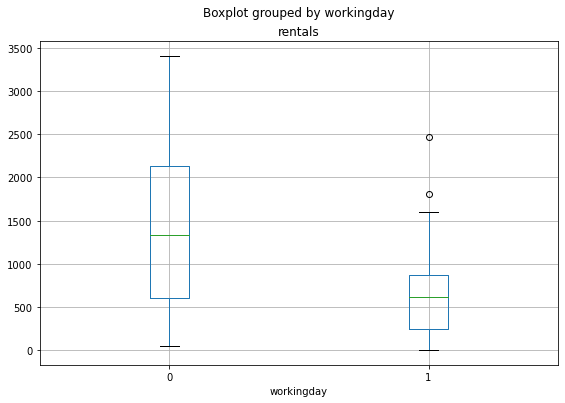

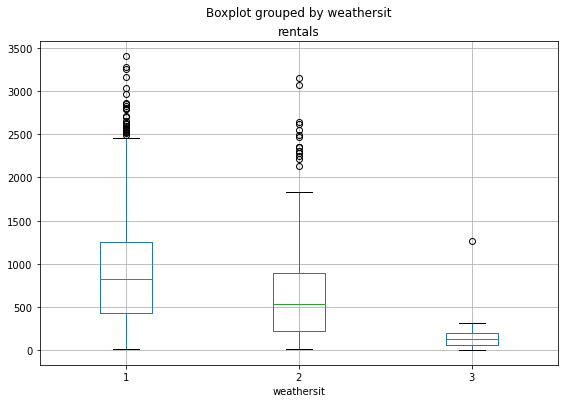

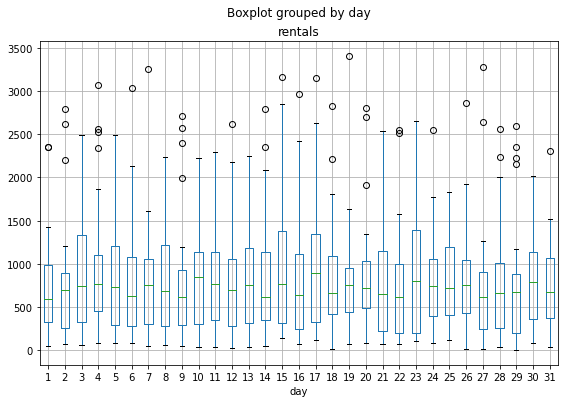

In [11]:
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    df.boxplot(column = 'rentals', by = col, ax = ax)
plt.show()

# Gráfico da quantidade de alugueis no ano de 2011 divido por estação, mês, feriado, dia da semana, dia de trabalho, clima e dia.

**'Estação do ano'(season), 'Mês'(mnth), 'Feriado'(holiday), 'Dias da semana'(weekday), 'Dia de trabalho'(workingday), 'Clima'(weathersit), 'Dia'(day)**

In [12]:
df_2011 = df[df['yr'] == 0]
df_2012 = df[df['yr'] == 1]

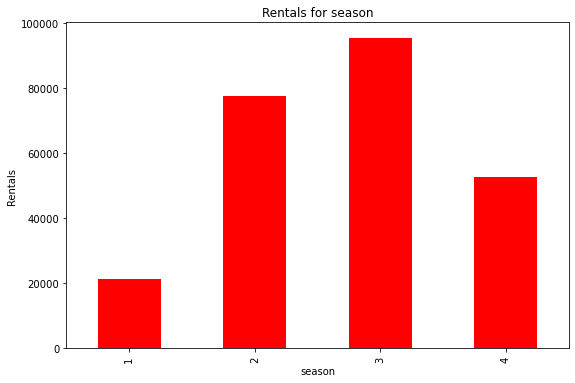

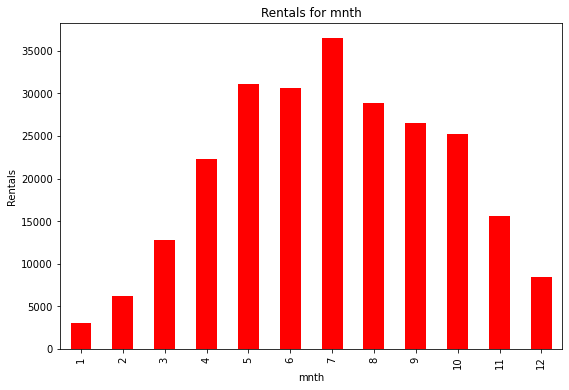

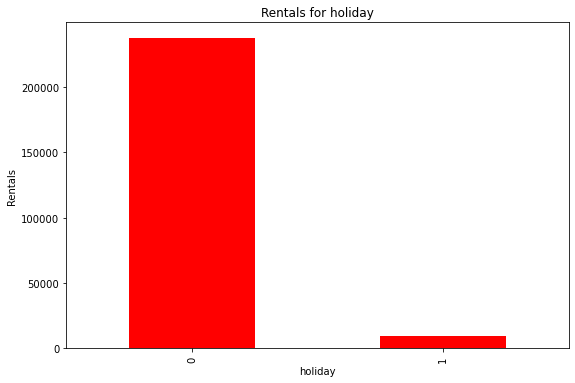

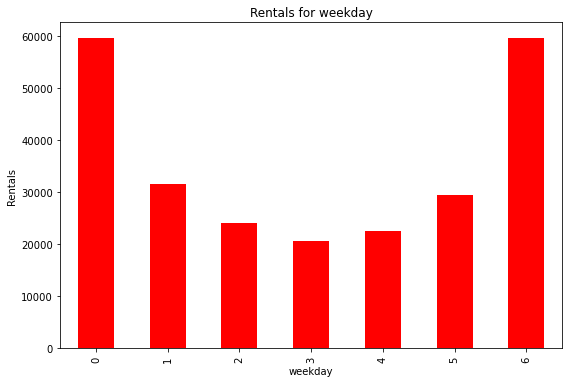

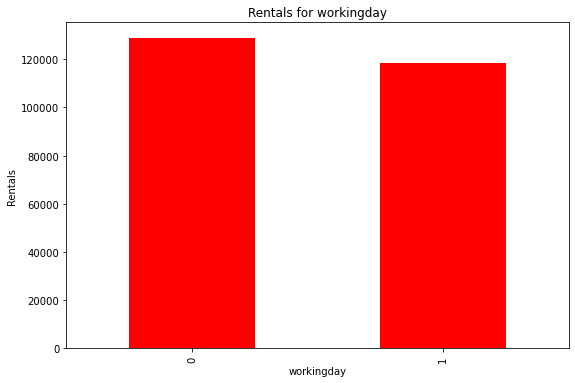

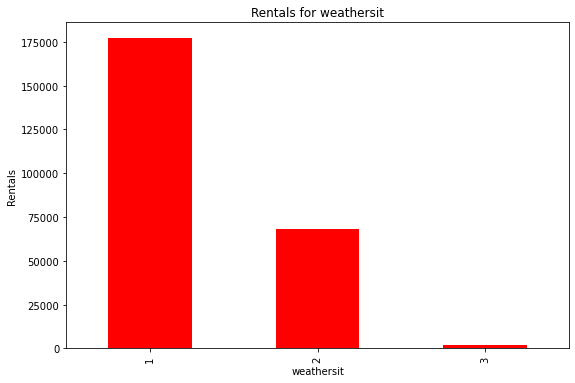

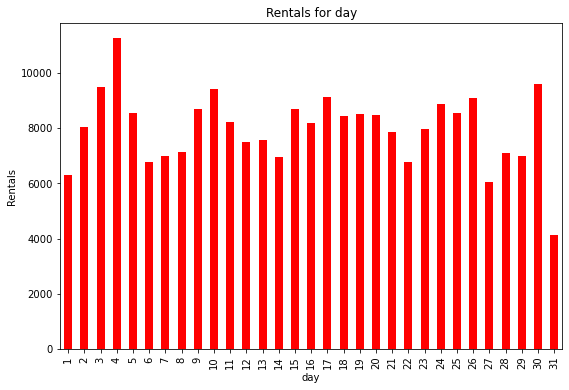

In [13]:
for col in categorical_features:
    rentals_counts = df_2011.groupby(col)['rentals'].sum()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    rentals_counts.plot.bar(ax = ax, color = 'red')
    ax.set_title('Rentals ' + 'for ' + col)
    ax.set_xlabel(col)
    ax.set_ylabel('Rentals')
plt.show();

# Gráfico da quantidade de alugueis no ano de 2012 divido por estação, mês, feriado, dia da semana, dia de trabalho, clima e dia.

**'Estação do ano'(season), 'Mês'(mnth), 'Feriado'(holiday), 'Dias da semana'(weekday), 'Dia de trabalho'(workingday), 'Clima'(weathersit), 'Dia'(day)**

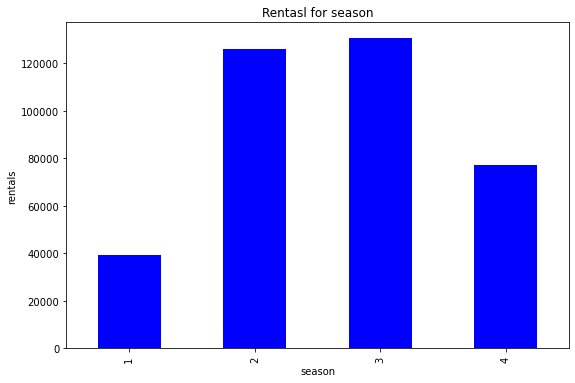

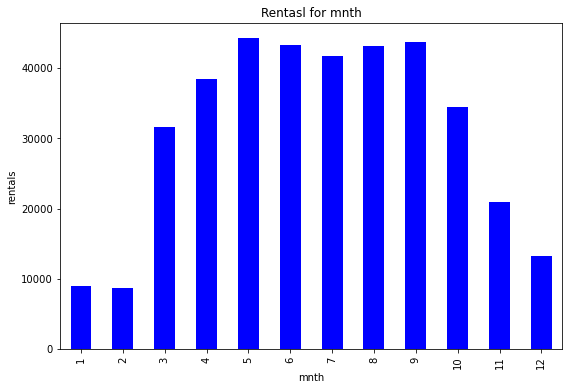

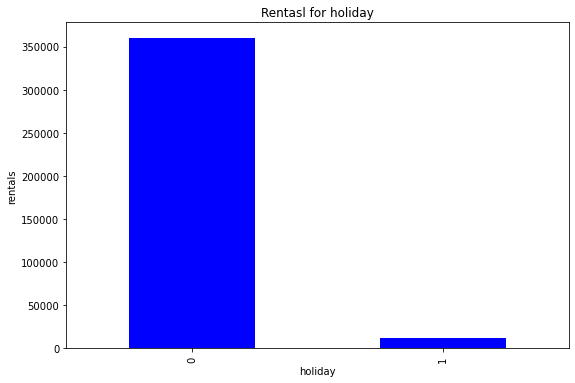

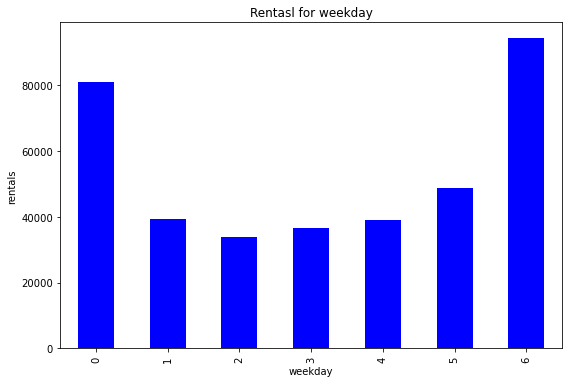

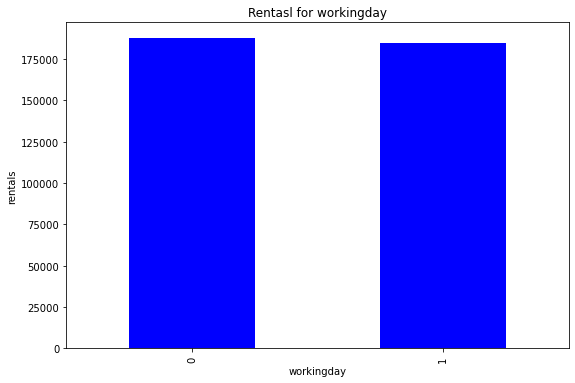

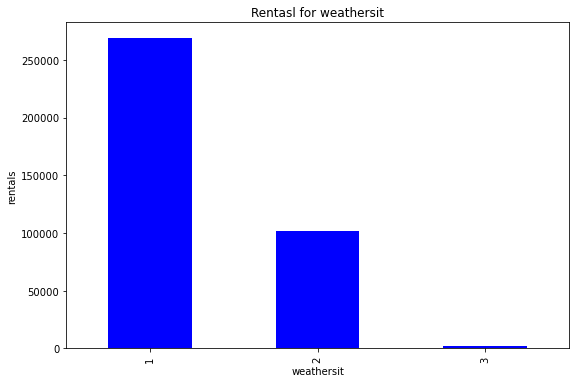

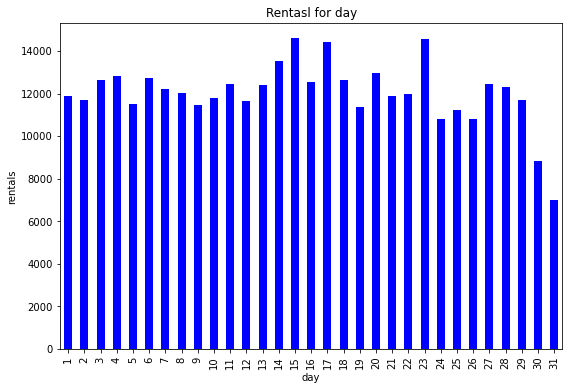

In [14]:
for col in categorical_features:
    rentals_counts = df_2012.groupby(col)['rentals'].sum()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    rentals_counts.plot.bar(ax = ax, color = 'blue')
    ax.set_title('Rentasl ' + 'for ' + col)
    ax.set_xlabel(col)
    ax.set_ylabel('rentals')
plt.show();

# **Treinar Modelo de Regressão**

Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. We'll use a *linear regression* algorithm, a common starting point for regression that works by trying to find a linear relationship between the *X* values and the *y* label. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In Scikit-Learn, training algorithms are encapsulated in *estimators*, and in this case we'll use the **LinearRegression** estimator to train a linear regression model.

In [15]:
df.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1


In [16]:
X = df[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values
y = df['rentals'].values

In [17]:
print('Features: ', X[:10], '\nLabels:', y[:10], sep='\n')

Features: 
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.       

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# **Validar Modelo Treinado - Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [21]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Rótulos Previstos: ', np.round(predictions)[:10])
print('Rótulos Atuais: ', y_test[:10])

Rótulos Previstos:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Rótulos Atuais:  [2418  754  222   47  244  145  240  555 3252   38]


There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the *residuals* of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of *error* when the model is used with new data for which the label is unknown.

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

- **Mean Square Error (MSE)**: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model
- **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>)**: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

> **Note**: You can find out more about these and other metrics for evaluating regression models in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
mse = mean_squared_error(y_test,predictions)
print('MSE', mse)

MSE 201972.55947035595


In [24]:
rmse = np.sqrt(mse)
print('RMSE',rmse)

RMSE 449.4135728595165


In [25]:
r2 = r2_score(y_test, predictions)
print('R2: ',r2)

R2:  0.604045473691919


# **Treinar Modelo de GradientBoostingRegressor**

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
model = GradientBoostingRegressor().fit(X_train,y_train)
print(model, '\n')

GradientBoostingRegressor() 



In [28]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE: ',mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
r2 = r2_score(y_test,predictions)
print('R2: ', r2)

MSE:  104052.25869175777
RMSE:  322.5713234181826
R2:  0.7960120775335925


# **Procurar e validar melhor estimador para o GradientBoostingRegressor**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

In [30]:
alg = GradientBoostingRegressor()

In [31]:
params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150]
}

In [32]:
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring = score, cv=3, return_train_score = True )
gridsearch.fit(X_train, y_train)
print('Best parameter combination: ', gridsearch.best_params_, '\n')

Best parameter combination:  {'learning_rate': 0.1, 'n_estimators': 100} 



In [33]:
model = gridsearch.best_estimator_
print(model, '\n')

GradientBoostingRegressor() 



In [34]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
r2 = r2_score(y_test, predictions)
print('R2: ', r2)

MSE:  103593.38499501595
RMSE:  321.85926271433596
R2:  0.7969116706154701


# **Treinar modelo de regressão k-nearest neighbors**

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
model = KNeighborsRegressor().fit(X_train, y_train)
print(model)

KNeighborsRegressor()


In [37]:
predictions = model.predict(X_test)
print('Rotulos previstos: ', np.round(predictions)[:10])
print('Rotulos atuais: ', y_test[:10])

Rotulos previstos:  [2014.  964.  184.  158.  142.  192.  775.  272. 1995.  134.]
Rotulos atuais:  [2418  754  222   47  244  145  240  555 3252   38]


In [38]:
mse = mean_squared_error(y_test, predictions)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
r2 = r2_score(y_test, predictions)
print('R2: ', r2)

MSE:  142079.9736363636
RMSE:  376.9349726894065
R2:  0.7214611291426051
